In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Create a simple dataset (Numbers 1 through 10)
data = pd.DataFrame({'Numbers': range(1, 20)})

# 2. Split with random_state=42
train1, test1 = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

# 3. Split AGAIN with the exact same random_state=42
train2, test2 = train_test_split(data, test_size=0.3, shuffle=False)

# 4. Split with a DIFFERENT random_state=1
train3, test3 = train_test_split(data, test_size=0.3, random_state=1, shuffle=True)

train4, test4 = train_test_split(data, test_size=0.3, random_state=0, shuffle=True)

print("Split 1 (Seed 42):", train1.values.flatten())
print("Split 2 (Seed 42):", train2.values.flatten())
print("Split 3 (Seed 1): ", train3.values.flatten())
print("Split 4 (Seed 0): ", train4.values.flatten())

Split 1 (Seed 42): [ 4 14 16 18  3 10 19  5 13  8 11 15  7]
Split 2 (Seed 42): [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Split 3 (Seed 1):  [ 5 17  8  2 14  1 19 18 10  9 13 12  6]
Split 4 (Seed 0):  [ 7  5  3  6 14 10  8 18 12  4  1 16 13]


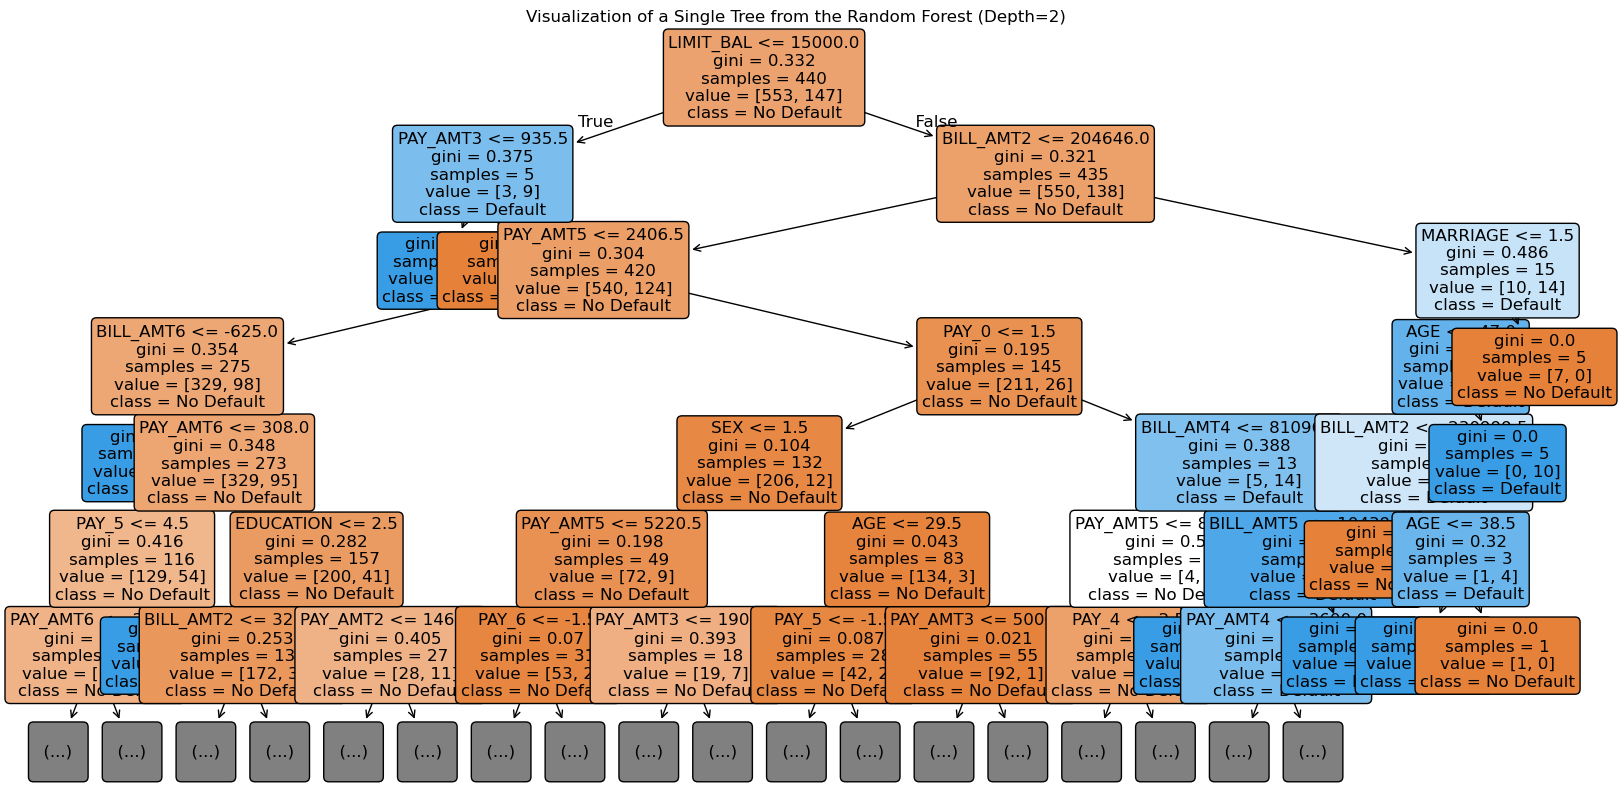

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# 1. Load and Prepare Data
# header=1 skips the first "X1, X2..." row and uses the actual names
df = pd.read_excel("default of credit card clients.xls", header=1)
df = df.iloc[:1000] # Use subset for speed

if "ID" in df.columns:
    df = df.drop("ID", axis=1)

# 2. Split Data
train_df, test_df = train_test_split(
    df, train_size=700, test_size=300, random_state=123, shuffle=True
)
X_train = train_df.drop("default payment next month", axis=1)
y_train = train_df["default payment next month"]

# 3. Fit the Random Forest
rf = RandomForestClassifier(
    n_estimators=100, 
    max_features=3, 
    random_state=123
)
rf.fit(X_train, y_train)

# 4. Draw the first tree from the forest
plt.figure(figsize=(20, 10))

# We access the first tree using rf.estimators_[0]
# max_depth=2 keeps the visualization clean and readable
plot_tree(
    rf.estimators_[2], 
    feature_names=X_train.columns.tolist(),
    class_names=['No Default', 'Default'],
    filled=True, 
    rounded=True,
    max_depth=6, 
    fontsize=12
)

plt.title("Visualization of a Single Tree from the Random Forest (Depth=2)")
plt.show()